In [1137]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error
import plotly.express as px

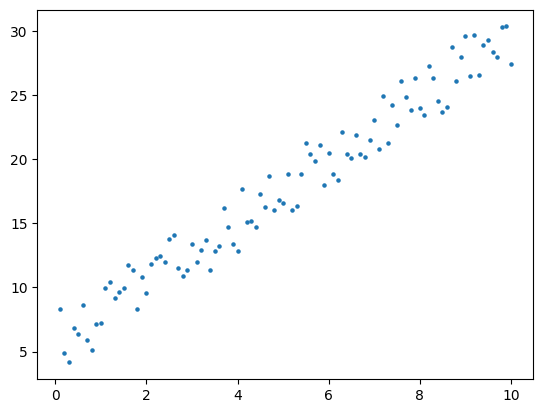

In [1138]:
df = pd.read_csv("Data1.csv")

# "X" and "Y" are the list of all xi and yi respectively.
X = [float(item) for item in list(df['x'])]
Y = [float(item) for item in list(df['y'])]

plt.scatter(X, Y, s=5)
plt.show()

In [1139]:
XY=[]
X_square=[]

for i in range(100):
  q = X[i] * Y[i]
  XY.append(q)

  p = X[i] ** 2
  X_square.append(p)

avg_XY = np.mean(XY)
avg_X = np.mean(X)
avg_Y = np.mean(Y)
avg_X_square = np.mean(X_square)

In [1140]:
m = (avg_XY - avg_X * avg_Y)/(avg_X_square - avg_X ** 2)
c = (avg_Y - m * avg_X)
print("value of m :", m)
print("value of c :", c)

value of m : 2.384060066057183
value of c : 5.680787126761226


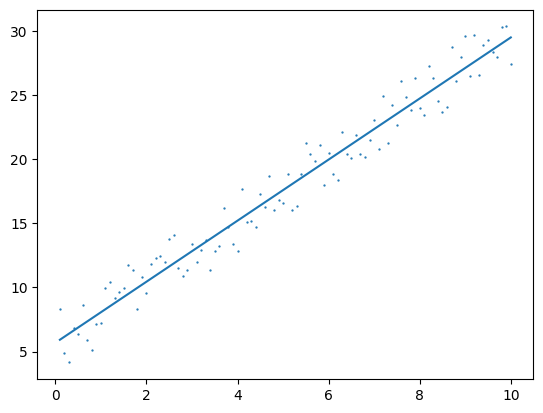

In [1141]:
predicted_Y = []
for i in range(100):
  r = m * X[i] + c
  predicted_Y.append(r)

#plotting graph; Given data set is scatter but predicted dataset is in the form of line.
plt.scatter(X, Y, s=0.4, )
plt.plot(X, predicted_Y)

**Verification**

In [1142]:
#Using linear Regression which is build by SkLearn.
regr = LinearRegression()

x_array = np.array(X).reshape(-1, 1)
y_array = np.array(Y).reshape(-1, 1)

regr.fit(x_array,y_array)
print("Slope: ",regr.coef_)
print("Intercept: ",regr.intercept_)

Slope:  [[2.38406007]]
Intercept:  [5.68078713]


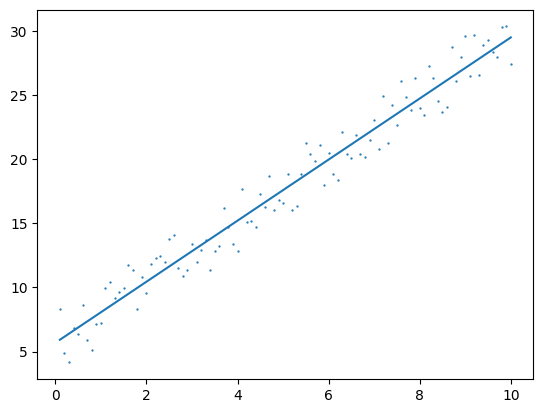

In [1143]:
#Now predicting the value of every data.
y_pred_array = regr.predict(x_array)
y_pred_list = list(y_pred_array.reshape(1,-1)[0])

plt.scatter(X, Y, s=0.4)
plt.plot(X, y_pred_list)

# plt.tick_params(left = False, bottom = False)
plt.show()

In [1144]:
# Error between "prediction by SKLearn Regression model" and "given data."

mae = mean_absolute_error(y_true=y_array,y_pred=y_pred_array)
mse = mean_squared_error(y_true=y_array,y_pred=y_pred_array)
rmse = root_mean_squared_error(y_true=y_array,y_pred=y_pred_array)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 1.280555978429147
MSE: 2.078525401777328
RMSE: 1.4417091945941551


In [1145]:
# Error between "prediction by My Own Regression model" and "given data."

mae = mean_absolute_error(y_true=y_array,y_pred=predicted_Y)
mse = mean_squared_error(y_true=y_array,y_pred=predicted_Y)
rmse = root_mean_squared_error(y_true=y_array,y_pred=predicted_Y)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 1.2805559784291467
MSE: 2.0785254017773265
RMSE: 1.4417091945941547


**My Prediction is more accurate than SK-Learn Library**

# Gradient Descent

In [1146]:
def gradient_descent(X, Y, learning_rate):

    n = len(Y) #total number of datasets.
    m = 0  #initialising m and c with 0.
    c = 0

    for _ in range(1000):  #epoch = 1000

        sum = 0
        for i in range(n):
            q = c*X[i] + m*X[i]*X[i] - X[i]*Y[i]
            sum = sum + q
        m_new = m - learning_rate * ((2/n) * sum)
        m = m_new

        sum = 0
        for i in range(n):
            q = c + m*X[i] - Y[i]
            sum = sum + q
        c_new = c - learning_rate * ((2/n) * sum)
        c = c_new

    return (m, c)

result = gradient_descent(X, Y, 0.01)
print(result)

(2.3902331961190626, 5.639726026491245)


# Stochastic Gradient Descent

In [1147]:
def stochastic_gradient_descent(X, Y, learning_rate):

    n = len(Y) #total number of datasets.
    m = 0 #initialising
    c = 0
    k = 1

    for _ in range(2000):  #epoch
        j = len(Y)
        while j > k:
            sum = 0
            for i in range(k):
                i=j-i-1
                q = c*X[i] + m*X[i]*X[i] - X[i]*Y[i]
                sum = sum + q
            m_new = m - learning_rate * ((2/n) * sum)
            m = m_new
            # print(m)
            j = j-k

        j = len(Y)
        while j > k:
            sum = 0
            for i in range(k):
                i=j-i-1
                q = c + m*X[i] - Y[i]
                sum = sum + q
            c_new = c - learning_rate * ((2/n) * sum)
            c = c_new
            # print(c)
            j = j-k

    return (m, c)

perm = np.random.permutation(len(Y))
v = np.array(X)
sx=v[perm]

l = np.array(Y)
sy=l[perm]

d=stochastic_gradient_descent(sx, sy, 0.01)
print(d)

(2.385221488431453, 5.684618234848698)
